# Bayesian Statistics/Probabilistic Programming using Pymc3

In this notebook, I intend to use Bayesian statistics using Pymc3 to predict when will the gym get crowded.
Here we have to define what it means by 'crowded', but hopefully the probabilistic programming will help us formulate a model to predict the attendance.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#let us load df2 again from df
df = pd.read_csv('data.csv', sep=',')
date = df['date']
new_date = date.str[:-6]
panda_date = pd.to_datetime(new_date)
df2 = df.drop(['date'], axis=1).set_index(np.array(panda_date))
df2.head()

,number_people,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
2015-08-14 17:00:11,37,61211,4,0,0,71.76,0,0,8,17
2015-08-14 17:20:14,45,62414,4,0,0,71.76,0,0,8,17
2015-08-14 17:30:15,40,63015,4,0,0,71.76,0,0,8,17
2015-08-14 17:40:16,44,63616,4,0,0,71.76,0,0,8,17
2015-08-14 17:50:17,45,64217,4,0,0,71.76,0,0,8,17


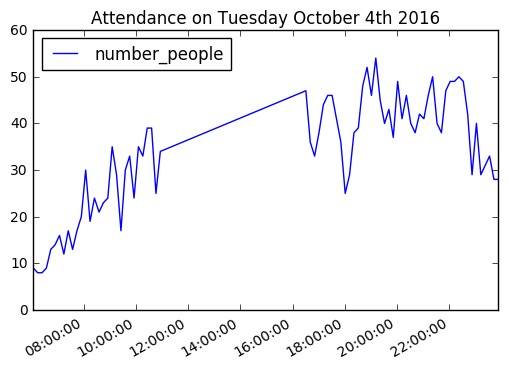

In [36]:
day_attendance =df2.loc['2016-10-04 06:00':'2016-10-04 23:59',['number_people']]
day_attendance.plot()
plt.title('Attendance on Tuesday October 4th 2016')


In [26]:
#Some statistics

print(day_attendance.min())
print(day_attendance.max())
print(day_attendance.median())
print(day_attendance.mean())
print(day_attendance.quantile(.75))

number_people    8
dtype: int64
number_people    54
dtype: int64
number_people    36.0
dtype: float64
number_people    33.44
dtype: float64
number_people    42.5
dtype: float64


In [21]:
#looks like the gym reaches the peak attendance around:
day_attendance[day_attendance['number_people']==54]

,number_people
2016-10-04 19:11:11,54


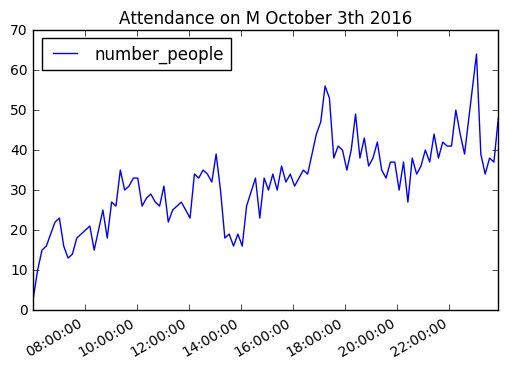

In [3]:
#We can also plot the attendance from M to F
M_attendance = df2.loc['2016-10-03 06:00':'2016-10-03 23:59',['number_people']]
M_attendance.plot()
plt.title('Attendance on M October 3th 2016')

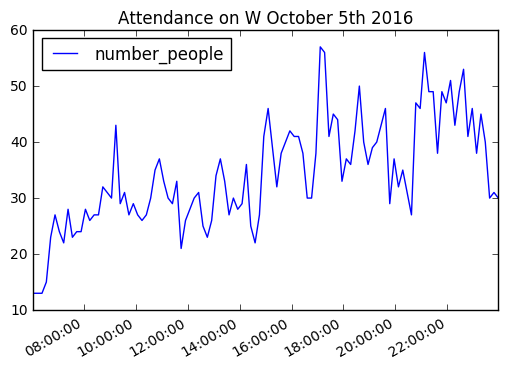

In [58]:
W_attendance = df2.loc['2016-10-05 06:00':'2016-10-05 23:59',['number_people']]
W_attendance.plot()
plt.title('Attendance on W October 5th 2016')

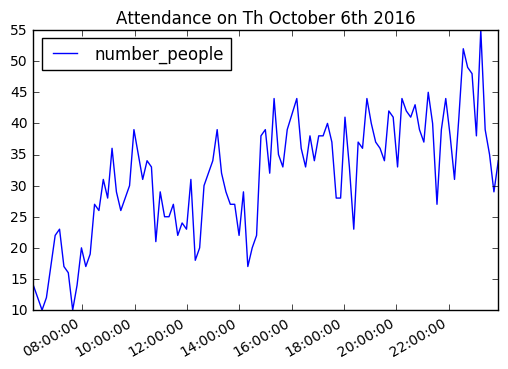

In [59]:
Th_attendance = df2.loc['2016-10-06 06:00':'2016-10-06 23:59',['number_people']]
Th_attendance.plot()
plt.title('Attendance on Th October 6th 2016')

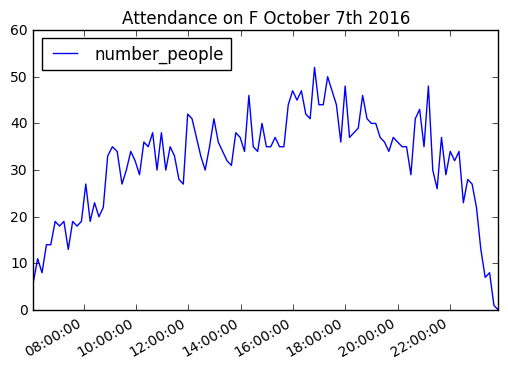

In [60]:
F_attendance = df2.loc['2016-10-07 06:00':'2016-10-07 23:59',['number_people']]
F_attendance.plot()
plt.title('Attendance on F October 7th 2016')

#everyone goes out partying after 10?

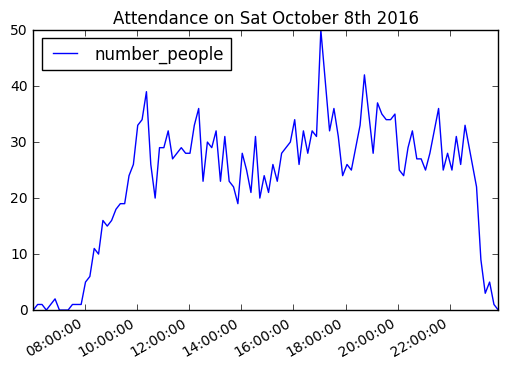

In [61]:
Sat_attendance = df2.loc['2016-10-08 06:00':'2016-10-08 23:59',['number_people']]
Sat_attendance.plot()
plt.title('Attendance on Sat October 8th 2016')

In [28]:
#some daily statistics spanning the entire month

october_attendance = df2.loc['2016-10-01 06:00:00':'2016-10-31 23:59',['number_people']]
print(october_attendance.min())
print(october_attendance.max())
print(october_attendance.median())
print(october_attendance.mean())
print(october_attendance.quantile(.75))

#or just type in october_attendance.describe() duh.....

number_people    0
dtype: int64
number_people    64
dtype: int64
number_people    26.0
dtype: float64
number_people    22.358846
dtype: float64
number_people    34.0
dtype: float64


In [40]:
#looks like the gym reaches the peak attendance around:
october_attendance[october_attendance['number_people']==64].index

DatetimeIndex(['2016-10-03 23:03:05'], dtype='datetime64[ns]', freq=None)

In [42]:
#which is :
october_attendance[october_attendance['number_people']==64].index.dayofweek

#Monday.

array([0])

In [43]:
# I guess we can see certain trends here: In a given week gym reaches its peak around Monday or Tuesday.
# Is that true?

In [44]:
octW1_attendance = df2.loc['2016-10-01 06:00:00':'2016-10-7 23:59',['number_people']]
octW2_attendance = df2.loc['2016-10-08 06:00:00':'2016-10-14 23:59',['number_people']]
octW3_attendance = df2.loc['2016-10-15 06:00:00':'2016-10-21 23:59',['number_people']]
octW4_attendance = df2.loc['2016-10-22 06:00:00':'2016-10-28 23:59',['number_people']]

In [45]:
print(octW1_attendance.describe())
print(octW2_attendance.describe())
print(octW3_attendance.describe())
print(octW4_attendance.describe())

       number_people
count     915.000000
mean       24.113661
std        15.275020
min         0.000000
25%        12.500000
50%        27.000000
75%        35.000000
max        64.000000
       number_people
count     813.000000
mean       24.952030
std        15.806057
min         0.000000
25%        12.000000
50%        28.000000
75%        36.000000
max        61.000000
       number_people
count     963.000000
mean       24.110073
std        15.284289
min         0.000000
25%        12.000000
50%        27.000000
75%        36.000000
max        61.000000
       number_people
count     961.000000
mean       21.434964
std        14.238452
min         0.000000
25%         9.000000
50%        24.000000
75%        33.000000
max        54.000000


In [51]:
#Which the maximum occurs on:
print(octW1_attendance[octW1_attendance['number_people']==int(octW1_attendance.max())].index)
print(octW2_attendance[octW2_attendance['number_people']==int(octW2_attendance.max())].index)
print(octW3_attendance[octW3_attendance['number_people']==int(octW3_attendance.max())].index)
print(octW4_attendance[octW4_attendance['number_people']==int(octW4_attendance.max())].index)


DatetimeIndex(['2016-10-03 23:03:05'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['2016-10-12 22:44:17'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['2016-10-20 21:38:17'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['2016-10-25 20:13:28', '2016-10-26 10:04:54'], dtype='datetime64[ns]', freq=None)


In [52]:
print(octW1_attendance[octW1_attendance['number_people']==int(octW1_attendance.max())].index.dayofweek)
print(octW2_attendance[octW2_attendance['number_people']==int(octW2_attendance.max())].index.dayofweek)
print(octW3_attendance[octW3_attendance['number_people']==int(octW3_attendance.max())].index.dayofweek)
print(octW4_attendance[octW4_attendance['number_people']==int(octW4_attendance.max())].index.dayofweek)

#all of them pretty much occur at night , and happen either on M, T, and W.

[0]
[2]
[3]
[1 2]


In [ ]:
#we can suspect that the gym will get busy after a certain time, say 7pm.
#we need to estimate a parameter that can better depict the time where the gym hits the maximum number
#or when the gym gets crowded.
#we dont know the parameter or yet what it means by crowded
#we need a model that can predict when does the gym get crowded

#this is a discrete case where the average number of attendance can be estimated with a poisson distribution
#and the waiting time in between each observation can be estimated with exponential distribution

In [4]:
#get x, the value observed in Monday
x = np.array(M_attendance.iloc[:,0], dtype=float)
x

array([  3.,  10.,  15.,  16.,  19.,  22.,  23.,  16.,  13.,  14.,  18.,
        19.,  20.,  21.,  15.,  20.,  25.,  18.,  27.,  26.,  35.,  30.,
        31.,  33.,  33.,  26.,  28.,  29.,  27.,  26.,  31.,  22.,  25.,
        26.,  27.,  25.,  23.,  34.,  33.,  35.,  34.,  32.,  39.,  30.,
        18.,  19.,  16.,  19.,  16.,  26.,  33.,  23.,  33.,  30.,  34.,
        30.,  36.,  32.,  34.,  31.,  33.,  35.,  34.,  39.,  44.,  47.,
        56.,  53.,  38.,  41.,  40.,  35.,  40.,  49.,  38.,  43.,  36.,
        38.,  42.,  35.,  33.,  37.,  37.,  30.,  37.,  27.,  38.,  34.,
        36.,  40.,  37.,  44.,  38.,  42.,  41.,  41.,  50.,  44.,  39.,
        64.,  39.,  34.,  38.,  37.,  48.])

In [13]:
x.dtype

dtype('float64')

In [72]:
#we need to get a prior distribution for lambda and tau.
#More importantly we need a model
'''
1. We will use poisson to represent count data
2. Poisson has parameter lambda
3. We need to estimate lambda. But there may be more than lambda. Let us assume there are two. Later we can estimate more
4. The lambda changes to another lambda at a switchpoint. We can call it tau.
5. We can estimate lambda using exponential distibution. It has a parameter alpha
6. We have no idea the distribution of alpha.
7. We also have no idea the distribution of tau. So let' assume it is a uniform distribution.


'''

"\n1. We will use poisson to represent count data\n2. Poisson has parameter lambda\n3. We need to estimate lambda. But there may be more than lambda. Let us assume there are two. Later we can estimate more\n4. The lambda changes to another lambda at a switchpoint. We can call it tau.\n5. We can estimate lambda using exponential distibution. It has a parameter alpha\n6. We have no idea the distribution of alpha.\n7. We also have no idea the distribution of tau. So let' assume it is a uniform distribution.\n\n\n"

In [5]:
import pymc3 as pm
import theano.tensor as tt

with pm.Model() as model:
    alpha = 1.0/x.mean() # Recall x is the variable that holds the attendance on one particular day
    lambda_1 = pm.Exponential("lambda_1", alpha)
    lambda_2 = pm.Exponential("lambda_2", alpha)
    tau = pm.DiscreteUniform("tau", lower=0, upper=len(x))

In [6]:
#since lambda_1 and _2 are random, lambda_ will be random as well
#think of lambda_ as a random variable.

with model:
    idx = np.arange(len(x)) # Index
    lambda_ = pm.math.switch(tau >= idx, lambda_1, lambda_2)

In [7]:
'''
The variable observation combines our data, x, with our proposed data generation
scheme, given by the variable lambda_, through the observed keyword.
'''
with model:
    observation = pm.Poisson("obs", lambda_, observed=x)

In [8]:
#MCMC: Markov Chain Monte Carlo
#it will be slow on a slow computer

with model:
    step = pm.Metropolis()
    trace = pm.sample(10000, tune=1000,step=step)

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:12<00:00, 771.39it/s]


In [9]:
#we collect the thousands of samples generated by MCMC and plot it

lambda_1_samples = trace['lambda_1']
lambda_2_samples = trace['lambda_2']
tau_samples = trace['tau']

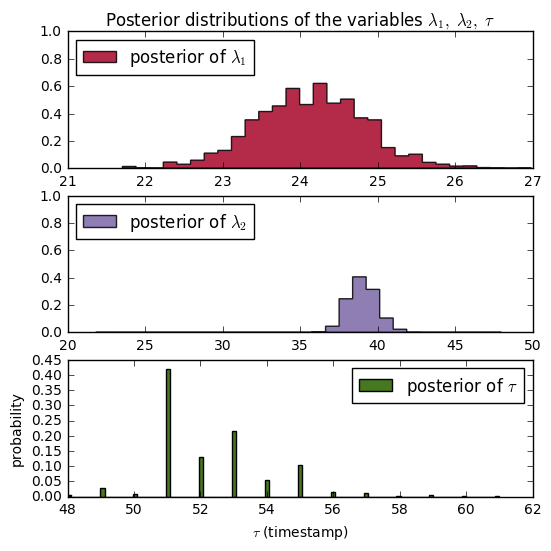

In [28]:
#histogram of the samples:

fig, ax = plt.subplots(figsize=(6,6))

ax = plt.subplot(311)
ax.set_autoscaley_on(False)

plt.hist(lambda_1_samples, histtype='stepfilled', alpha=0.85, bins=30,
         label="posterior of $\lambda_1$", color="#A60628", normed=True)
plt.legend(loc="upper left")
plt.title(r"""Posterior distributions of the variables $\lambda_1,\;\lambda_2,\;\tau$""")
#plt.xlim([15, 30])
plt.xlabel("$\lambda_1$ value")

ax = plt.subplot(312)
ax.set_autoscaley_on(False)
plt.hist(lambda_2_samples, histtype='stepfilled', alpha=0.85, bins=30,
    label="posterior of $\lambda_2$", color="#7A68A6", normed=True)
plt.legend(loc="upper left")
#plt.xlim([15, 30])
plt.xlabel("$\lambda_2$ value")

plt.subplot(313)
w = 1.0 / tau_samples.shape[0] * np.ones_like(tau_samples)
plt.hist(tau_samples, alpha=1, bins=len(x),
    label=r"posterior of $\tau$",
    color="#467821", weights=w, rwidth=2.)
#plt.xticks(np.arange(len(x)))
plt.legend(loc="best")
#plt.ylim([0, .75])
#plt.xlim([35, len(x) - 20])
plt.xlabel(r"$\tau$ (timestamp)")
plt.ylabel("probability");

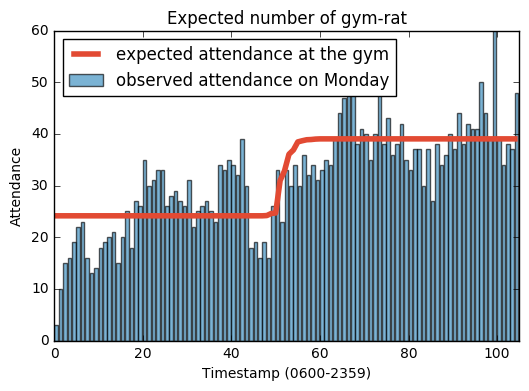

In [43]:
# tau_samples, lambda_1_samples, lambda_2_samples contain
# N samples from the corresponding posterior distribution
N = tau_samples.shape[0]
expected_attendance_per_day = np.zeros(len(x))
for time in range(0, len(x)):
    
# ix is a bool index of all tau samples corresponding to
# the switchpoint occurring prior to value of 'day'
    ix = time < tau_samples
# Each posterior sample corresponds to a value for tau.
# for each time, that value of tau indicates whether we're "before"
# (in the lambda1 "regime") or
# "after" (in the lambda2 "regime") the switchpoint.
# by taking the posterior sample of lambda1/2 accordingly, we can average
# over all samples to get an expected value for lambda on that day.
# As explained, the "attendance count" random variable is Poisson distributed,
# and therefore lambda (the poisson parameter) is the expected value of
# "attendance count".
    expected_attendance_per_day[time] = (lambda_1_samples[ix].sum() + lambda_2_samples[~ix].sum()) / N

plt.plot(range(len(x)), expected_attendance_per_day, lw=4, color="#E24A33", label="expected attendance at the gym")
plt.xlim(0, len(x))
plt.xlabel("Timestamp (0600-2359)")
plt.ylabel("Attendance")
plt.title("Expected number of gym-rat")
plt.ylim(0, 60)
plt.bar(np.arange(len(x)), x, color="#348ABD", alpha=0.65, label="observed attendance on Monday")
plt.legend(loc="best");

In [39]:
#The change seems to occur around timestamp 50, which is :

M_attendance.iloc[50]

number_people    33
Name: 2016-10-03 14:33:09, dtype: int64

In [ ]:
#Let's us ask more questions here to refine our model:

#how do we include more observations to improve our model?

In [44]:
#anyway, here's more 

#an alternative of monte carlo simulation is to use map
#The maximum a posteriori (MAP) estimate for a model, is the mode of the posterior
#distribution and is generally found using numerical optimization methods

from pymc3 import find_MAP
map_estimate = find_MAP(model=model)
print(map_estimate)

Optimization terminated successfully.
         Current function value: 377.240283
         Iterations: 8
         Function evaluations: 15
         Gradient evaluations: 15
{'lambda_1_log_': array(3.182160466160244), 'lambda_2_log_': array(3.66344384539953), 'tau': array(52, dtype=int64)}


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002353E79BB00>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000002353EB851D0>]], dtype=object)

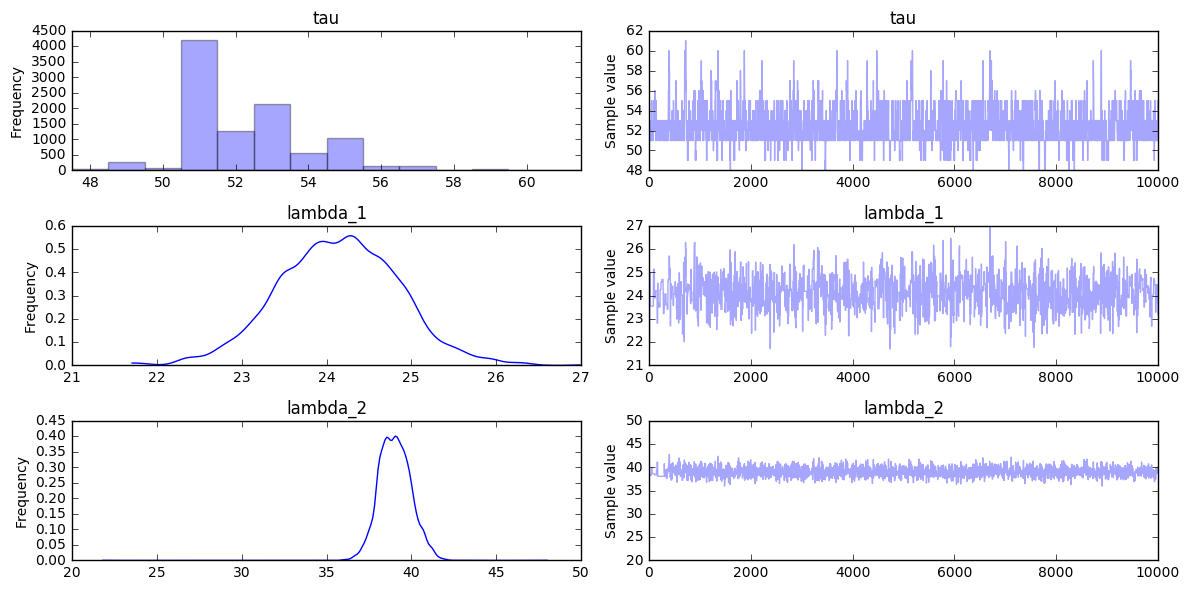

In [47]:
#we can plot the trace from the mcmc using traceplot

from pymc3 import traceplot
traceplot(trace)